In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statistics
import warnings
import seaborn as sns
import random as rd
import sys
sys.path.append('../scripts')
from cleaner import CleanDataFrame
from plotter import Plotter
cleaner = CleanDataFrame()
plotter = Plotter()

In [2]:
store_df = pd.read_csv('../data/store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [4]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [5]:
cleaner.percent_missing(store_df)

The dataset contains 21.01 % missing values.


In [6]:
print('unique values for CompetitionOpenSinceMonth  ' + str(store_df['CompetitionOpenSinceMonth'].unique()))
print('unique values for CompetitionOpenSinceYear  ' + str(store_df['CompetitionOpenSinceYear'].unique()))
print('unique values for promo2sinceweek  ' + str(store_df['Promo2SinceWeek'].unique()))
print('unique values for Promo2SinceYear  ' + str(store_df['Promo2SinceYear'].unique()))
print('unique values for PromoInterval  ' + str(store_df['PromoInterval'].unique()))

unique values for CompetitionOpenSinceMonth  [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
unique values for CompetitionOpenSinceYear  [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
unique values for promo2sinceweek  [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
unique values for Promo2SinceYear  [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
unique values for PromoInterval  [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


# as we can see on the above output
       - missing values match between corelated columns in counts that is a good sign
       - Competition open columns can be filled with the most earliest year and month because we do not have the year and month of opening the store we can not be sure
       - Promo2sinceweek and Promo2sinceyear can be filled with 0 as PromoInterval shows there were no promotions for those stores
       - Promointerval can be filled with string other than month name comma separated string we will use "Nan,Nan,Nan,Nan" 

In [7]:
store_df  = cleaner.fix_missing_values(store_df,['CompetitionOpenSinceYear'],1990) 
store_df  = cleaner.fix_missing_values(store_df,['CompetitionOpenSinceMonth'],1) 
store_df  = cleaner.fix_missing_values(store_df,['Promo2SinceWeek','Promo2SinceYear'],0) 
store_df  = cleaner.fix_missing_values(store_df,['PromoInterval'],"Nan,Nan,Nan,Nan") 
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [8]:
store_df  = cleaner.fix_missing_values(store_df,['CompetitionDistance'],store_df['CompetitionDistance'].max()) 
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [9]:
store_df = cleaner.fix_datatypes(store_df)
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   string 
 2   Assortment                 1115 non-null   string 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   int64  
 5   CompetitionOpenSinceYear   1115 non-null   int64  
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   int64  
 8   Promo2SinceYear            1115 non-null   int64  
 9   PromoInterval              1115 non-null   string 
dtypes: float64(1), int64(6), string(3)
memory usage: 87.2 KB


In [10]:
store_df = cleaner.drop_duplicates(store_df)
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
1,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9,2009,0,0,0,"Nan,Nan,Nan,Nan"
4,5,a,a,29910.0,4,2015,0,0,0,"Nan,Nan,Nan,Nan"
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4,2006,0,0,0,"Nan,Nan,Nan,Nan"
1112,1113,a,c,9260.0,1,1990,0,0,0,"Nan,Nan,Nan,Nan"
1113,1114,a,c,870.0,1,1990,0,0,0,"Nan,Nan,Nan,Nan"


In [11]:
train_df = pd.read_csv('../data/train.csv')
train_df

C:\Users\User\AppData\Local\Temp\ipykernel_3864\847756438.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../data/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [12]:
cleaner.percent_missing(train_df)

The dataset contains 0.0 % missing values.


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [14]:
print('unique values for StateHoliday  ' + str(train_df['StateHoliday'].unique()))

unique values for StateHoliday  ['0' 'a' 'b' 'c' 0]


As we can see above StateHoliday can be changes to string type because there is an integer value and we can change the value 0 to None ('0') so that the data has no stateholidays 

In [15]:

# train_df.loc[train_df["StateHoliday"] == 0, "StateHoliday"] = "0"
train_df = cleaner.replace_value(train_df,"StateHoliday",0,"0")
print('unique values for StateHoliday  ' + str(train_df['StateHoliday'].unique()))

unique values for StateHoliday  ['0' 'a' 'b' 'c']


In [16]:
train_df = cleaner.fix_datatypes(train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  string        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), string(1)
memory usage: 69.8 MB


In [17]:
train_df = cleaner.drop_duplicates(train_df)
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [18]:
test_df = pd.read_csv('../data/test.csv')
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [20]:
cleaner.percent_missing(test_df)

The dataset contains 0.0 % missing values.


In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [23]:
test_df = cleaner.fix_datatypes(test_df)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  string        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), string(1)
memory usage: 2.5 MB


In [24]:
test_df = cleaner.drop_duplicates(test_df)
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [47]:
train_df['Week_Number'] = train_df['Date'].dt.isocalendar().week
train_df['Year'] = train_df['Date'].dt.year
train_df['Day'] = train_df['Date'].dt.day
train_df['Month'] = train_df['Date'].dt.month
train_df['weekday'] = train_df['DayOfWeek'].apply(lambda x: 0 if x >5 else 1)
train_df['day_of_year'] = train_df['Date'].dt.dayofyear
train_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_3864\2617216813.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_df['Week_Number'] = train_df['Date'].dt.week


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Year,Day,weekday,day_of_year,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,31,2015,31,1,212,7
1,2,5,2015-07-31,6064,625,1,1,0,1,31,2015,31,1,212,7
2,3,5,2015-07-31,8314,821,1,1,0,1,31,2015,31,1,212,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,2015,31,1,212,7
4,5,5,2015-07-31,4822,559,1,1,0,1,31,2015,31,1,212,7


In [43]:
test_df = test_df
test_df['Week_Number'] = test_df['Date'].dt.week
test_df['Year'] = test_df['Date'].dt.year
test_df['Day'] = test_df['Date'].dt.day
test_df['Month'] = test_df['Date'].dt.month
test_df['weekday'] = test_df['DayOfWeek'].apply(lambda x: 0 if x >5 else 1)
test_df['day_of_year'] = test_df['Date'].dt.dayofyear
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Year,Day,weekday,day_of_year,Month
0,1,1,4,2015-09-17,1.0,1,0,0,38,2015,17,1,260,9
1,2,3,4,2015-09-17,1.0,1,0,0,38,2015,17,1,260,9
2,3,7,4,2015-09-17,1.0,1,0,0,38,2015,17,1,260,9
3,4,8,4,2015-09-17,1.0,1,0,0,38,2015,17,1,260,9
4,5,9,4,2015-09-17,1.0,1,0,0,38,2015,17,1,260,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,31,2015,1,0,213,8
41084,41085,1112,6,2015-08-01,1.0,0,0,0,31,2015,1,0,213,8
41085,41086,1113,6,2015-08-01,1.0,0,0,0,31,2015,1,0,213,8
41086,41087,1114,6,2015-08-01,1.0,0,0,0,31,2015,1,0,213,8


In [48]:
train_merged_df = pd.merge(train_df, store_df, how='inner', on='Store')
train_merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,...,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,31,...,7,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
1,1,4,2015-07-30,5020,546,1,1,0,1,31,...,7,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
2,1,3,2015-07-29,4782,523,1,1,0,1,31,...,7,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
3,1,2,2015-07-28,5011,560,1,1,0,1,31,...,7,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
4,1,1,2015-07-27,6102,612,1,1,0,1,31,...,7,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"


In [49]:
test_merged_df = pd.merge(test_df, store_df, how='inner', on='Store')
test_merged_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Year,...,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,38,2015,...,9,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
1,857,1,3,2015-09-16,1.0,1,0,0,38,2015,...,9,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
2,1713,1,2,2015-09-15,1.0,1,0,0,38,2015,...,9,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
3,2569,1,1,2015-09-14,1.0,1,0,0,38,2015,...,9,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
4,3425,1,7,2015-09-13,0.0,0,0,0,37,2015,...,9,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"


In [ ]:
# Analysis

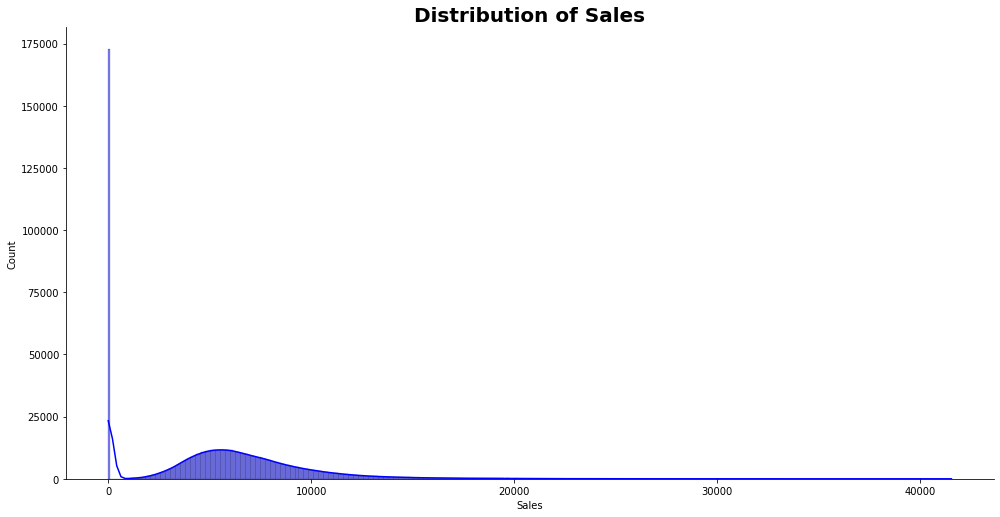

In [38]:
plotter.plot_hist(train_merged_df, 'Sales', 'blue')

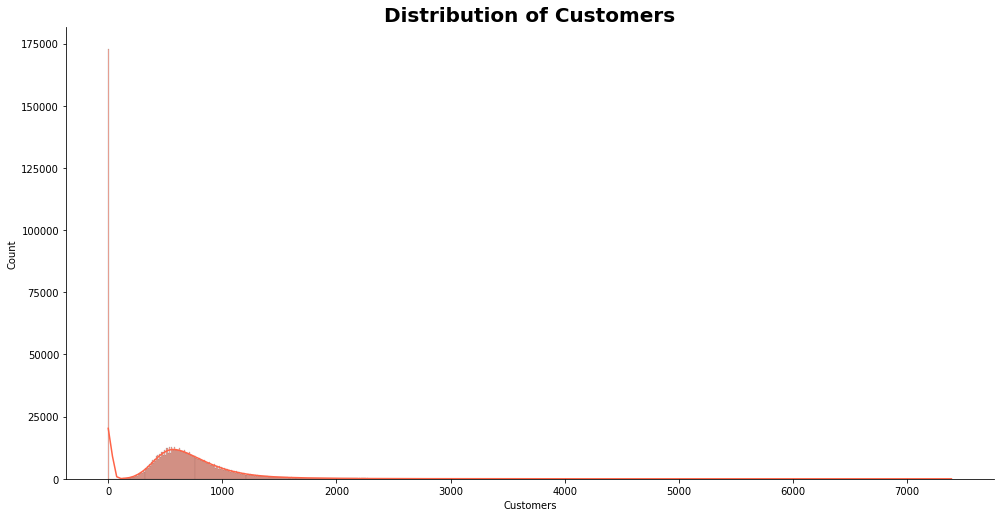

In [39]:
plotter.plot_hist(train_merged_df, 'Customers', 'tomato')

In [78]:
train_merged_df.groupby(by=['Store']).aggregate({'Sales': 'sum','Customers': 'sum'})
train_merged_df.groupby(by=['Year']).aggregate({'Sales': 'sum','Customers': 'sum'})
year_month = train_merged_df.groupby(['Year','Month'], sort=False, as_index=False).aggregate({'Sales': 'sum','Customers': 'sum'})
# print('unique values for StateHoliday  ' + str(train_merged_df['Year'].unique()))
year_month

,Year,Month,Sales,Customers
0,2015,7,212322616,22253888
1,2015,6,207363373,21645129
2,2015,5,189143897,20193848
3,2015,4,197918886,21053991
4,2015,3,205631683,21809641
5,2015,2,178275458,19481381
6,2015,1,198843730,21110481
7,2014,12,202120592,20800624
8,2014,11,173327953,18686232
9,2014,10,164216398,18734892


<AxesSubplot:xlabel='year-month'>

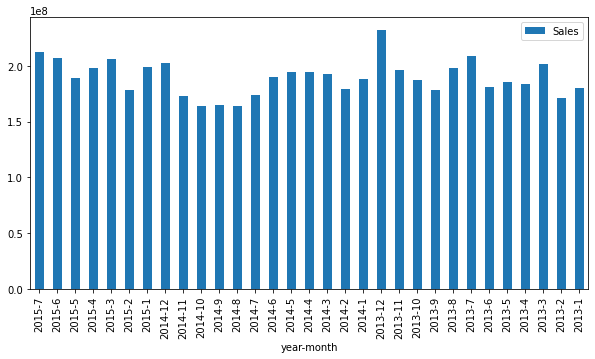

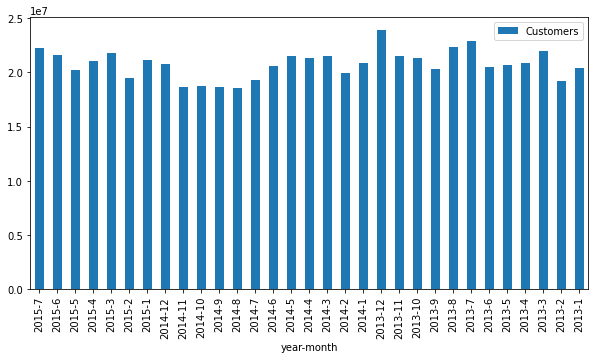

In [80]:
# df[['period', 'A', 'B', 'C']].plot(x='period', kind='bar', stacked=True)
df = year_month.copy()
# df = pd.DataFrame(data[1:],columns=data[0])
# df.set_index(['Year','Month'], inplace=True)

df['year-month'] = df.apply(lambda row: str(row.Year)+'-' + str(row.Month), axis=1)
df.head()
# piv = df.pivot(columns="Sales").plot(kind="bar", subplots=True)
# plt.tight_layout()
# plt.show()
# ax = df.plot(x=['Year', 'Month'],y='Sales',kind='bar',color=["g","b"])
# plt.show()
# fig, ax = plt.subplots()
df.plot.bar(x='year-month',y=['Sales'],figsize=(10,5))
df.plot.bar(x='year-month',y=['Customers'],figsize=(10,5))
# plotter.plot_bar(df,'y',['Sales','Customers'],'ghjk','fghj','dfghj')

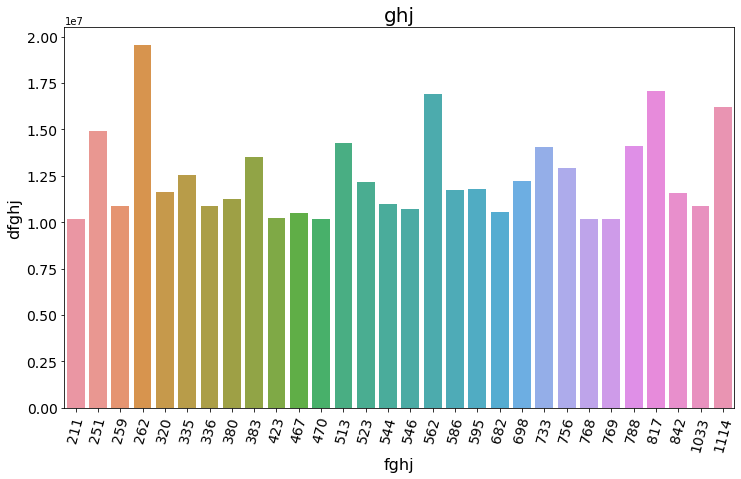

In [92]:
store_combo = train_merged_df.groupby(by=['Store']).aggregate({'Sales': 'sum','Customers': 'sum'}).reset_index().sort_values(by="Sales",ascending=False)
# store_combo
plotter.plot_bar(store_combo.head(30),'Store','Sales','Stores With Top Sales Number','Store ID','Number of sales')